In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Salary_Data.csv to Salary_Data.csv


Saving Salary_Data.csv to Salary_Data (1).csv


In [4]:
data = np.genfromtxt('Salary_Data.csv', delimiter=',', names=True)

In [5]:
X = data['YearsExperience']
y = data['Salary']

In [6]:
X = np.vstack((np.ones(X.shape[0]), X)).T

In [7]:
theta = np.zeros(X.shape[1])
learning_rate = 0.01
num_iterations = 1000

In [8]:
def hypothesis(X, theta):
    return X @ theta

def cost_function(X, y, theta):
    m = len(y)
    return (1 / (2 * m)) * np.sum((hypothesis(X, theta) - y) ** 2)

def gradient_descent(X, y, theta, learning_rate, num_iterations):
    m = len(y)
    for _ in range(num_iterations):
        gradient = (1 / m) * X.T @ (hypothesis(X, theta) - y)
        theta -= learning_rate * gradient
    return theta


In [9]:
learning_rates = [0.001, 0.01, 0.1, 0.5, 1]
num_iterations = 1000

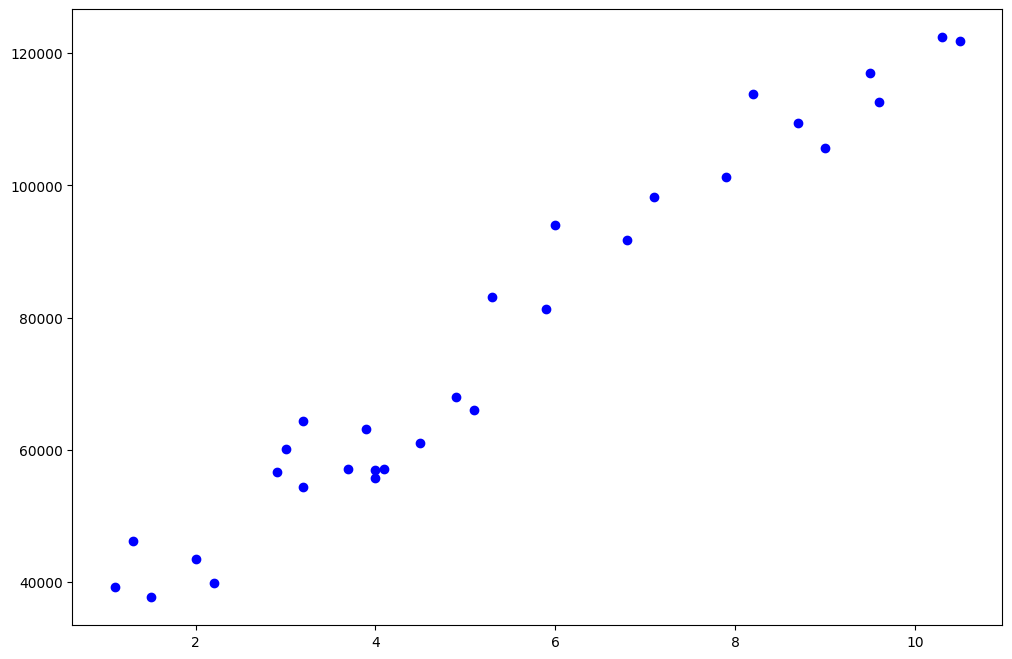

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(data['YearsExperience'], data['Salary'], color='blue', marker='o', label='Data points')

<ipython-input-8-b6615125c622>:11: RuntimeWarning: overflow encountered in matmul
  gradient = (1 / m) * X.T @ (hypothesis(X, theta) - y)
<ipython-input-8-b6615125c622>:12: RuntimeWarning: invalid value encountered in subtract
  theta -= learning_rate * gradient


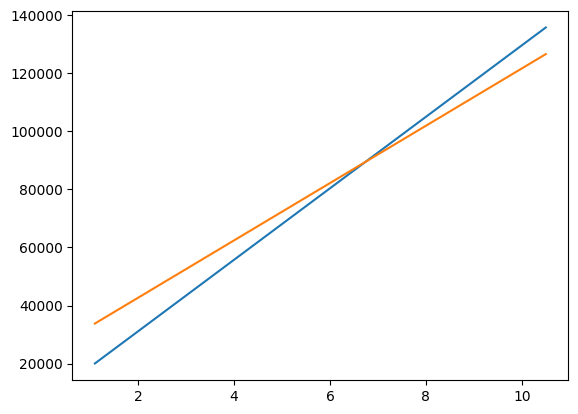

In [11]:
for alpha in learning_rates:
    theta = np.zeros(X.shape[1])
    theta = gradient_descent(X, y, theta, alpha, num_iterations)
    x_range = np.linspace(min(X[:, 1]), max(X[:, 1]), 100)
    X_range = np.vstack((np.ones(x_range.shape[0]), x_range)).T
    y_range = hypothesis(X_range, theta)
    plt.plot(x_range, y_range, label=f'Alpha = {alpha}')

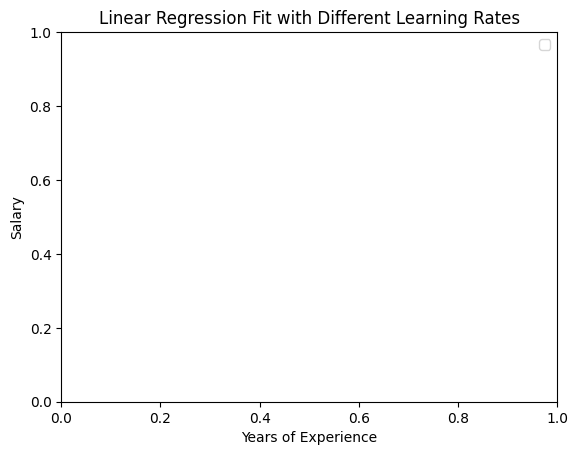

In [12]:
plt.title('Linear Regression Fit with Different Learning Rates')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

plt.show()